# Mongo DB

In [3]:
%run 'log_parser_util.ipynb'

# Write only mode

In [10]:
mongodb_files_write_1 = open_files(3)

In [13]:
mongodb_files_write_1 = ['/home/ruby/Desktop/logs/mongodb/executionlogs1/write/30.0HZ/write_2017-12-03 15:12:19_30.0_hz.log',
 '/home/ruby/Desktop/logs/mongodb/executionlogs1/write/60.0HZ/write_2017-12-03 15:24:32_60.0_hz.log',
 '/home/ruby/Desktop/logs/mongodb/executionlogs1/write/120.0HZ/write_2017-12-03 15:36:08_120.0_hz.log']

In [14]:
mongodb_avgs_write_1 = get_avg(mongodb_files_write_1)
mongodb_df_write_1 = pd.DataFrame(mongodb_avgs_write_1, columns=['Event-1', 'Event-2', 'Event-3', 'Event-4','Event-5','Event-6'],
                   index=['30hz','60hz','120hz'])

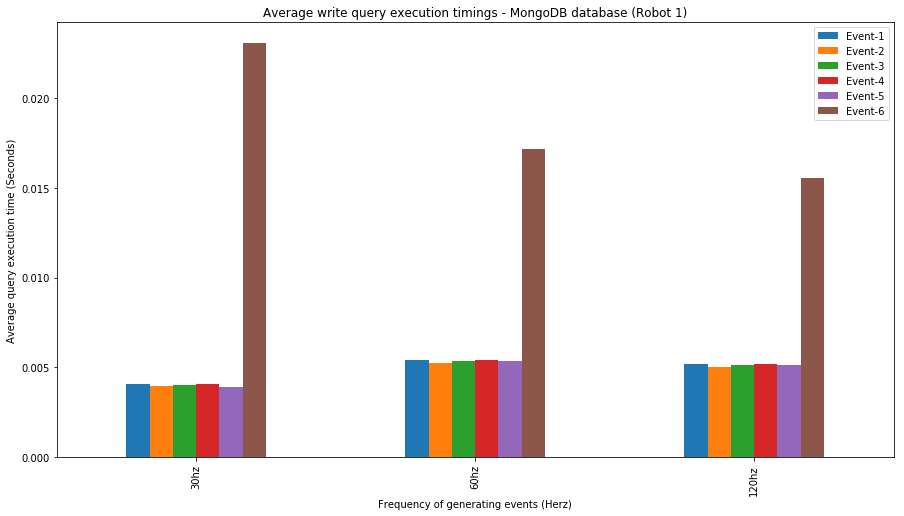

In [15]:
plot("Average write query execution timings - MongoDB database (Robot 1)",1,mongodb_df_write_1)

In [16]:
print "Average write query execution timings - MongoDb database (Robot 1)"
HTML(mongodb_df_write_1.to_html(classes="table table-striped table-bordered"))

Average write query execution timings - MongoDb database (Robot 1)


,Event-1,Event-2,Event-3,Event-4,Event-5,Event-6
30hz,0.004074,0.003961,0.004027,0.004063,0.003941,0.023059
60hz,0.005438,0.005245,0.005347,0.005399,0.005337,0.017156
120hz,0.005174,0.005047,0.005145,0.005176,0.005128,0.015577


# Observation:

* The first 5 events execution time pattern is rising with respect to the frequencies 30Hz, 60Hz, and 120Hz. But it is strange that the query execution time for writing blobs are **inversely proportional** to the frequency.

* Compared to CouchDB, MongoDB write timings are 90% lesser. 

Note: 

MongoDB supports only master slave architecture, so test setup is also based on master slave architecture, but CouchDB setup is implemented based on master-master architecture.

MongoDB have less workload on the node than CouchDB in terms of bidirectional replication. 

For example in CouchDB implementation there are 3 robots connected together via network, and if robot 1 and robot 2 generate sensor data, it will be replicated to robot 3 immediately and vice versa. 

But in case of MongoDb implementation, the sensor data generated in the robot will be stored in the master node (which is running in the robot itself) and replicated to the central data node(which is a slave node accepts only read request)

# Read only mode

In [17]:
mongodb_files_read_1 = open_files(3)

In [19]:
mongodb_files_read_1 = ['/home/ruby/Desktop/logs/mongodb/executionlogs1/read/30.0HZ/read_2017-12-03 15:46:27_30.0_hz.log',
 '/home/ruby/Desktop/logs/mongodb/executionlogs1/read/60.0HZ/read_2017-12-03 16:05:23_60.0_hz.log',
 '/home/ruby/Desktop/logs/mongodb/executionlogs1/read/120.0HZ/read_2017-12-03 16:15:43_120.0_hz.log']

In [20]:
mongodb_avgs_read_1 = get_avg_read(mongodb_files_read_1)
mongodb_df_read_1 = pd.DataFrame(mongodb_avgs_read_1, columns=['Query-1', 'Query-2', 'Query-3', 'Query-4'],
                   index=['30hz','60hz','120hz'])

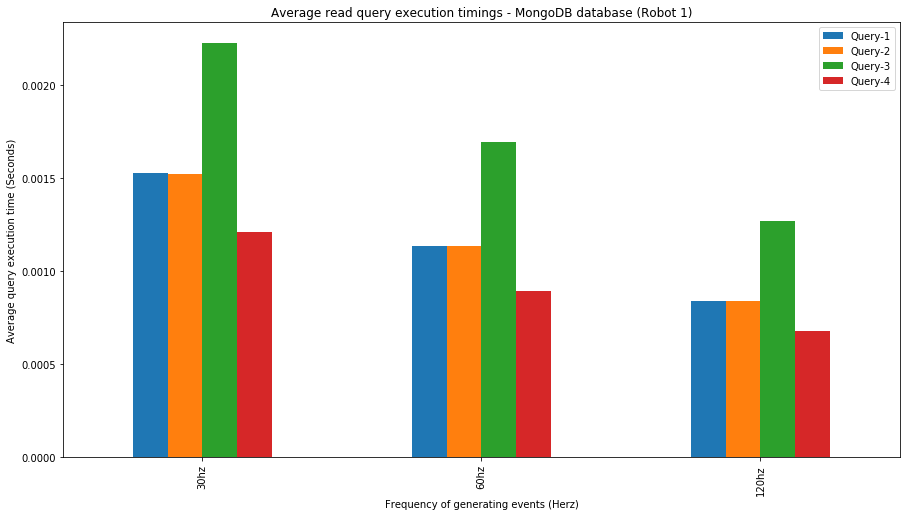

In [39]:
plot("Average read query execution timings - MongoDB database (Robot 1)",1,mongodb_df_read_1)

In [23]:
print "Average read query execution timings - MongoDB database (Robot 1)"
HTML(mongodb_df_read_1.to_html(classes="table table-striped table-bordered"))

Average read query execution timings - MongoDB database (Robot 1)


,Query-1,Query-2,Query-3,Query-4
30hz,0.001529,0.001522,0.002227,0.001209
60hz,0.001136,0.001137,0.001695,0.000892
120hz,0.000843,0.000843,0.001269,0.000677


# Observation:

Compared to couchDB, mongoDB consumes more time to query data from datanode. For example, to query a blob file at the rate of 120hz couchDB took 0.000086 seconds, but mongoDB took 0.000677 seconds.

# Write with read mode

In [24]:
mongodb_files_rw_write_1 = open_files(3)

In [26]:
mongodb_files_rw_write_1 = ['/home/ruby/Desktop/logs/mongodb/executionlogs1/rw_write/30.0HZ/rw_write_2017-12-03 16:27:34_30.0_hz.log',
 '/home/ruby/Desktop/logs/mongodb/executionlogs1/rw_write/60.0HZ/rw_write_2017-12-03 16:37:47_60.0_hz.log',
 '/home/ruby/Desktop/logs/mongodb/executionlogs1/rw_write/120.0HZ/rw_write_2017-12-03 16:49:37_120.0_hz.log']

In [28]:
mongodb_avgs_rw_write_1 = get_avg(mongodb_files_rw_write_1)
mongodb_df_rw_write_1 = pd.DataFrame(mongodb_avgs_rw_write_1, columns=['Event-1', 'Event-2', 'Event-3', 'Event-4','Event-5','Event-6'],
                   index=['30hz','60hz','120hz'])

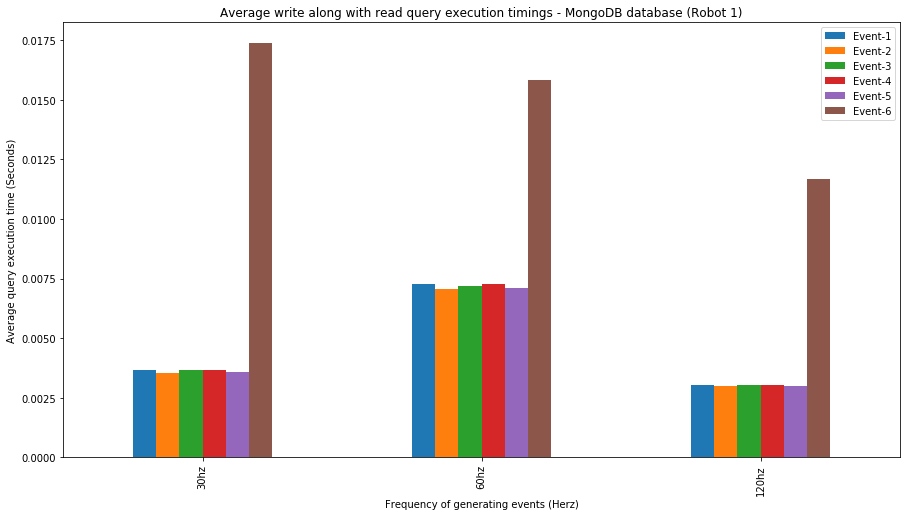

In [29]:
plot("Average write along with read query execution timings - MongoDB database (Robot 1)",1,mongodb_df_rw_write_1)


In [40]:
print "Average write along with read query execution timings - MongoDB database (Robot 1)"
HTML(mongodb_df_rw_write_1.to_html(classes="table table-striped table-bordered"))

Average write along with read query execution timings - MongoDB database (Robot 1)


,Event-1,Event-2,Event-3,Event-4,Event-5,Event-6
30hz,0.003668,0.003534,0.003647,0.003655,0.003596,0.017384
60hz,0.007273,0.007072,0.007175,0.007271,0.007114,0.015851
120hz,0.003047,0.002977,0.003025,0.003043,0.003006,0.011679


Note: 

By comparing "write with read" scenario and "write only scenario", it shows that "write with read" query execution time is 10% lesser than "write only scenario"

# Read with write mode

In [31]:
mongodb_files_rw_read_1 = open_files(3)

In [33]:
mongodb_files_rw_read_1 = ['/home/ruby/Desktop/logs/mongodb/executionlogs1/rw_read/30.0HZ/rw_read_2017-12-03 16:27:36_30.0_hz.log',
 '/home/ruby/Desktop/logs/mongodb/executionlogs1/rw_read/60.0HZ/rw_read_2017-12-03 16:37:49_60.0_hz.log',
 '/home/ruby/Desktop/logs/mongodb/executionlogs1/rw_read/120.0HZ/rw_read_2017-12-03 16:49:38_120.0_hz.log']

In [34]:
mongodb_avgs_rw_read_1 = get_avg_read(mongodb_files_rw_read_1)
mongodb_df_rw_read_1 = pd.DataFrame(mongodb_avgs_rw_read_1, columns=['Query-1', 'Query-2', 'Query-3', 'Query-4'],
                   index=['30hz','60hz','120hz'])

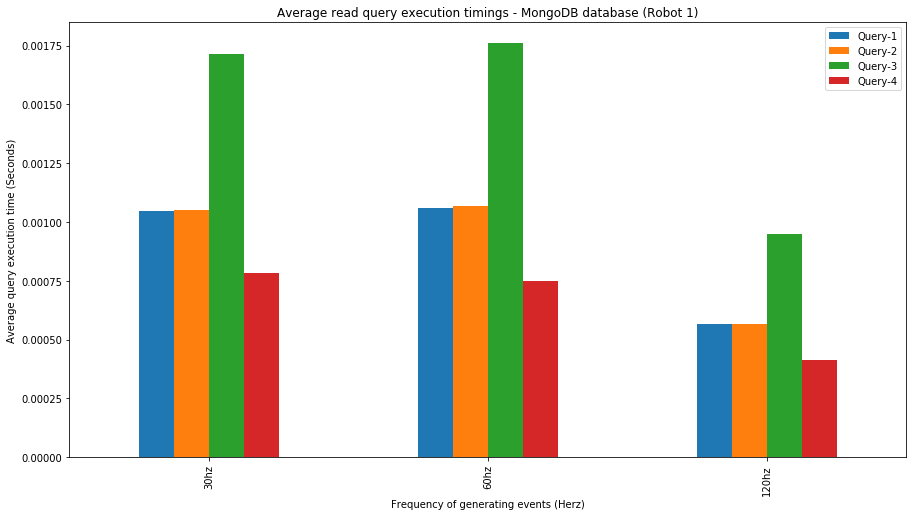

In [38]:
plot("Average read query execution timings - MongoDB database (Robot 1)",1,mongodb_df_rw_read_1)


In [42]:
print "Average read query execution timings with write operation- MongoDB database (Robot 1)"
HTML(mongodb_df_rw_read_1.to_html(classes="table table-striped table-bordered"))

Average read query execution timings with write operation- MongoDB database (Robot 1)


,Query-1,Query-2,Query-3,Query-4
30hz,0.001046,0.001050,0.001716,0.000782
60hz,0.001062,0.001069,0.001761,0.000748
120hz,0.000567,0.000567,0.000947,0.000413


# Average Replication Time: 

In [43]:
files = open_files(2)

In [44]:
#MongoDB replication time
get_replica_results(files)

'Average time to replicate an event from one data node to other is, 0.0472 seconds'